**Collecting Data**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import shutil
import os

source = r'/content/gdrive/MyDrive/resistance prediction dataset.zip'
destination = r'/content/resistance prediction dataset.zip'
shutil.copyfile(source, destination)

'/content/resistance prediction dataset.zip'

In [ ]:
import zipfile 
local_zip = destination
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

**Explore data & preprocessing**

In [ ]:
path = r'/content/resistance prediction dataset/'
categories= os.listdir(path)
categories

['4 more days', '6 more days', '10 more days', '2 more days', '8 more days']

In [ ]:
def count_num_file(path,name_dir):
  num_file = len(os.listdir(path+name_dir))
  return num_file
  
for categorie in categories :
  print("{} directory : {} file ".format(categorie, count_num_file(path,categorie)))

4 more days directory : 691 file 
6 more days directory : 245 file 
10 more days directory : 340 file 
2 more days directory : 42 file 
8 more days directory : 102 file 


**Image Augmentation**
Because 2 days before directory have small number of file, so we add more augmentation on that directory. 

In [ ]:
import os
from PIL import Image 
path_rotate = r'/content/resistance prediction dataset/2 more days/'
file_name = os.listdir(path_rotate)

for i in file_name:
  if i.endswith(".jpg"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(40).save(path_rotate+'rotate_40'+i)


for i in file_name:
  if i.endswith(".jpg"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(85).save(path_rotate+'rotate_85'+i)
            
for i in file_name:
  if i.endswith(".jpg"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(100).save(path_rotate+'rotate_100'+i)

for i in file_name:
  if i.endswith(".jpg"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(145).save(path_rotate+'rotate_145'+i)
for i in file_name:
  if i.endswith(".jpg"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(200).save(path_rotate+'rotate_200'+i)


for i in file_name:
  if i.endswith(".jpg"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(240).save(path_rotate+'rotate_240'+i)
    

for i in file_name:  
  if i.endswith(".jpg"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(270).save(path_rotate+'rotate_270'+i)

In [ ]:
for categorie in categories :
  print("{} folder : {} file ".format(categorie, count_num_file(path,categorie)))

4 more days folder : 691 file 
6 more days folder : 245 file 
10 more days folder : 340 file 
2 more days folder : 336 file 
8 more days folder : 102 file 


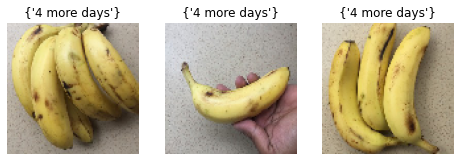

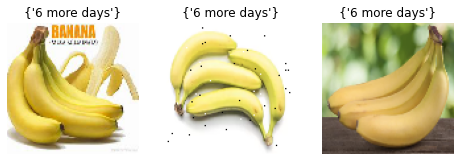

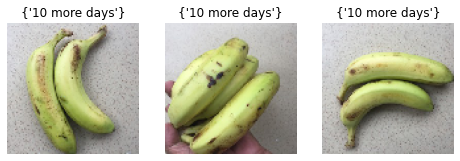

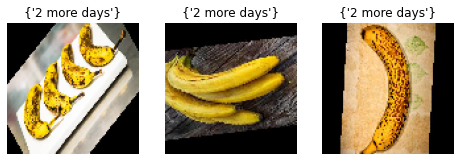

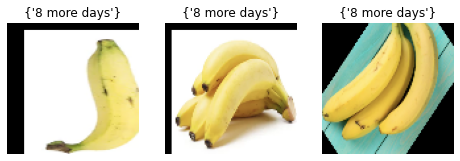

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline


def plot_img(name):
  img = [fn for fn in os.listdir(f'{path}/{name}')]
  
 
  select_img= np.random.choice(img, 3, replace = False)

  
  fig = plt.figure(figsize = (8,6))
  for i in range(3):
      if i < 3:
        fp = f'{path}/{name}/{select_img[i]}'
        label = {name}
      
      ax = fig.add_subplot(1,3,i+1)
    
      fn = image.load_img(fp, target_size = (100,100))
      plt.imshow(fn)
      plt.title(label)
      plt.axis('off')
  plt.show()

for categorie in categories:
  plot_img(categorie)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    zoom_range=0.2,                 
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode = 'nearest',
                    validation_split=0.2)
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode = 'nearest',
                    validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        path,  
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical',
        subset='training')
val_generator = train_datagen.flow_from_directory(
        path,  
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 1372 images belonging to 5 classes.
Found 342 images belonging to 5 classes.


**Create model with transfer learning from Inception V3**

In [ ]:

import tensorflow as tf
model = tf.keras.models.Sequential([
  
  
    #base,
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(100, 100, 3)),
    #tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    #tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(32, activation='relu',),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
    
    #base,
    #
    #tf.keras.layers.Dense(128, activation='relu'),
    #
    #tf.keras.layers.Dropout(0.2),
  
    #tf.keras.layers.Dense(5, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 49, 49, 16)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 47, 47, 8)         1160      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 8)         0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 23, 23, 8)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4232)             

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
from keras import callbacks
from keras.callbacks import ModelCheckpoint
earlystop = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 25, 
                                        restore_best_weights = True)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99!")
callbacks = myCallback()

In [ ]:
modelcheck = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history=model.fit(
      train_generator,
      steps_per_epoch=25, 
      epochs=100,
      validation_data=val_generator, 
      validation_steps=9, 
      callbacks=[modelcheck,earlystop,callbacks],
      verbose=1)

Epoch 1/100
25/25 [==============================] - 10s 376ms/step - loss: 1.6025 - accuracy: 0.3065 - val_loss: 1.5853 - val_accuracy: 0.4201

Epoch 00001: val_accuracy improved from -inf to 0.42014, saving model to best_model.h5
Epoch 2/100
25/25 [==============================] - 9s 366ms/step - loss: 1.4895 - accuracy: 0.3894 - val_loss: 1.5579 - val_accuracy: 0.4410

Epoch 00002: val_accuracy improved from 0.42014 to 0.44097, saving model to best_model.h5
Epoch 3/100
25/25 [==============================] - 9s 371ms/step - loss: 1.4186 - accuracy: 0.4000 - val_loss: 1.4988 - val_accuracy: 0.5069

Epoch 00003: val_accuracy improved from 0.44097 to 0.50694, saving model to best_model.h5
Epoch 4/100
25/25 [==============================] - 9s 362ms/step - loss: 1.3482 - accuracy: 0.4862 - val_loss: 1.4438 - val_accuracy: 0.4965

Epoch 00004: val_accuracy did not improve from 0.50694
Epoch 5/100
25/25 [==============================] - 9s 363ms/step - loss: 1.2626 - accuracy: 0.4888 

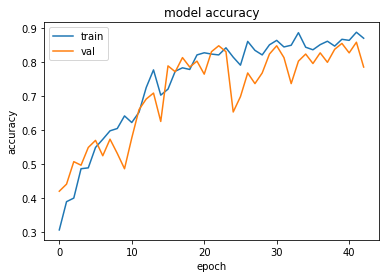

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(val_generator)

print('Accuracy train: ', score_train[1])
print('Accuracy test: ', score_valid[1])

11/11 [==============================] - 2s 168ms/step - loss: 0.9737 - accuracy: 0.8275
Accuracy train:  0.9067055583000183
Accuracy test:  0.8274853825569153


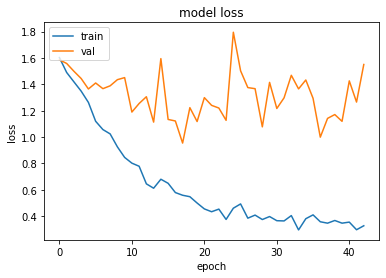

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
train_generator.class_indices


{'10 more days': 0,
 '2 more days': 1,
 '4 more days': 2,
 '6 more days': 3,
 '8 more days': 4}

Saving pisang-raja-garutexpressid-442a9783bd14a08f521ffdfd3f603246.jpg to pisang-raja-garutexpressid-442a9783bd14a08f521ffdfd3f603246.jpg
pisang-raja-garutexpressid-442a9783bd14a08f521ffdfd3f603246.jpg
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 5.9346887e-16 0.0000000e+00]]
Best Before 12 day


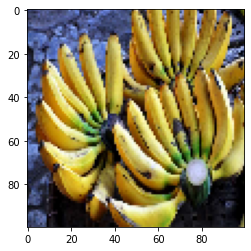

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size= 32)
  hasil = np.argmax(classes)
  print(fn)
  print(classes)

 
 #{'1 hari': 0, '12 hari': 1, '3 hari': 2, '7 hari': 3}
  if classes[0,0] == 1.0:
    print('Best Before 1 day')
  elif classes[0,1] == 1.0:
    print('Best Before 12 day')
  elif classes[0,2] == 1.0:
    print('Best Before 3 day')
  else:
    print('Best Before 7 day')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 204
drwxr-xr-x 2 root root   4096 Jun  8 00:05 assets
-rw-r--r-- 1 root root  17117 Jun  8 00:05 keras_metadata.pb
-rw-r--r-- 1 root root 179862 Jun  8 00:05 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  8 00:05 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'Banana-resistance-prediction.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('Banana-resistance-prediction.txt', 'w') as f:
    f.write('\n'.join(categories))

In [ ]:
try:
    files.download('Banana-resistance-prediction.tflite')
    files.download('Banana-resistance-prediction.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the trained model as a Keras HDF5 file. 

saved_model_path = "./Banana-resistance-prediction.h5"

model.save(saved_model_path)